# **AdaBoost**

In [4]:
# importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
# importing scikit learn libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [6]:
data=pd.read_csv("/content/HR Employee Attrition.csv")
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [7]:
le=LabelEncoder()

In [8]:
# performing label encoding
for col in data.select_dtypes(include=["object"]).columns:
  data[col]=le.fit_transform(data[col])

In [9]:
# counting values in the Attrition column
print(data['Attrition'].value_counts())

Attrition
0    1233
1     237
Name: count, dtype: int64


In [10]:
no=data[data['Attrition']==0]
yes=data[data['Attrition']==1]

## **Resampling**

In [11]:
# resampling data because of unbalance
from sklearn.utils import resample

# performing Resampling
resample_yes = resample(
    yes,
    replace=True,
    n_samples=len(no),
    random_state=42
)

data=pd.concat([no,resample_yes])

In [12]:
# counting values in the Attrition column
print(data['Attrition'].value_counts())

Attrition
0    1233
1    1233
Name: count, dtype: int64


In [13]:
x=data.drop("Attrition",axis=1)
y=data["Attrition"]

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [15]:
scale=StandardScaler()

In [16]:
# scaling the training and testing data
x_train=scale.fit_transform(x_train)
x_test=scale.transform(x_test)

## **Training with AdaBoost**

In [18]:
ada=AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=100, #number of decision trees involved
    learning_rate=0.5, #decides how big or small weight of the prediction should be. (if α=0.8, and LR is 0.5, then α becomes 0.4)
    random_state=42
)

In [19]:
ada.fit(x_train,y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=100, random_state=42)

In [20]:
y_pred=ada.predict(x_test)

In [38]:
acc=accuracy_score(y_test,y_pred)

In [39]:
print("-----------------AdaBoost Results-----------------\n")
print("Accuracy:",acc)
print("\nClassification Report:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

-----------------AdaBoost Results-----------------

Accuracy: 0.7702702702702703

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.80      0.78       367
           1       0.79      0.74      0.76       373

    accuracy                           0.77       740
   macro avg       0.77      0.77      0.77       740
weighted avg       0.77      0.77      0.77       740

Confusion Matrix:
 [[294  73]
 [ 97 276]]


## **HyperParameter Tuning**

In [25]:
param = {
    "n_estimators":[50,100,200],
    "learning_rate":[0.01,0.1,0.5,0.8],
    "estimator": [DecisionTreeClassifier(max_depth=1),
                 DecisionTreeClassifier(max_depth=2)]
}

In [28]:
grid=GridSearchCV(
    AdaBoostClassifier(random_state=42),
    param,
    scoring="f1",
    cv=5,
    n_jobs=-1 #number of CPUs
)

In [30]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42), n_jobs=-1,
             param_grid={'estimator': [DecisionTreeClassifier(max_depth=1),
                                       DecisionTreeClassifier(max_depth=2)],
                         'learning_rate': [0.01, 0.1, 0.5, 0.8],
                         'n_estimators': [50, 100, 200]},
             scoring='f1')

In [40]:
hp_score=grid.best_score_
print("Best Parameters:",grid.best_params_)
print("Best Score:",hp_score)

Best Parameters: {'estimator': DecisionTreeClassifier(max_depth=2), 'learning_rate': 0.8, 'n_estimators': 200}
Best Score: 0.8835942211564907


In [41]:
print("Accuracy Before HyperParameter Tuning:",acc)
print("Accuracy After HyperParameter Tuning:",hp_score)

Accuracy Before HyperParameter Tuning: 0.7702702702702703
Accuracy After HyperParameter Tuning: 0.8835942211564907


## **Visualization**

In [44]:
features=x.columns
importance=ada.feature_importances_

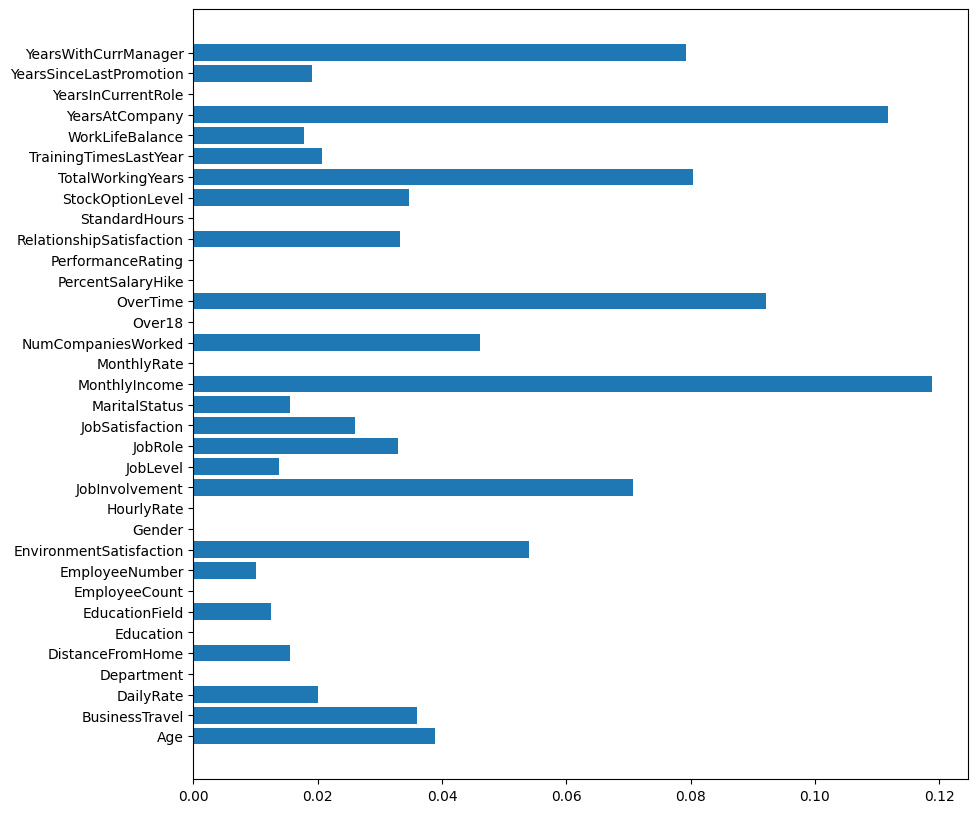

In [47]:
plt.figure(figsize=(10,10))
plt.barh(features,importance) #horizontal bar plot
plt.xlabel=("Features")
plt.ylabel=("Importance")
plt.title=("AdaBoost Feature Importance")
plt.show()
